<a href="https://colab.research.google.com/github/Chris-Luersen/School-Projects/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
# modify "customized_path_to_homework", path of folder in drive, where you uploaded your homework
customized_path_to_homework = "/content/drive/My Drive/urbcomp_fall2020/assignment_2"
sys.path.append(customized_path_to_homework)

# Problem 1: Download and process the data
Data can be found at https://archive.ics.uci.edu/ml/datasets/Census+Income (adult.data
file contain data; adult.names contain attribute information). This database contains
information such as age, work class, education, marital status, race, sex etc. Most
information is categorical. Hence they need to be converted into dummy variables for
usage. This can easily be achieved using the LabelEncoder api in Scikit-Learn. 

## ii. Create a dataset with the following attributes.  
> a. Age  
b. Work class - convert to dummy variables  
c. Education - converted to dummy variables  
d. Marital-status - convert to dummy variables  
e. Occupation - convert to dummy variables  
f. Relationship - convert to dummy variables  
g. Race - convert to dummy variables  
h. Sex - convert to dummy variables  
i. Hours per week  
j. Native country - convert to dummy variables  
k. Income - convert to dummy variables



In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income']
data = pd.read_csv('/content/drive/My Drive/urbcomp_fall2020/assignment_2/data/adult_data.csv', names=names)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##i. Sample 10000 random records from the above database. 


In [ ]:
data = data[:10001]

##iii. Save the dataset as a CSV file.
The first line of the CSV file should be the attribute names as described in the previous question. 

In [ ]:
from google.colab import files
data.to_csv('assignment_2_data.csv') 
files.download("assignment_2_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##iv. Plot the frequency of some of the attributes in question ii. relative to Income

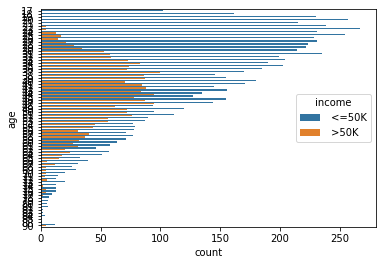

In [ ]:
sns.countplot(y='age', hue='income', data=data) 

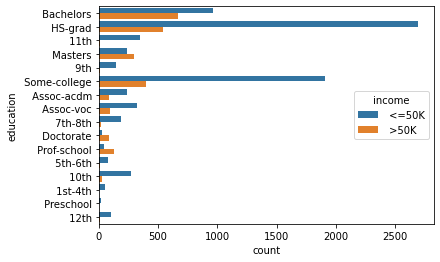

In [ ]:
sns.countplot(y='education', hue='income', data=data) 

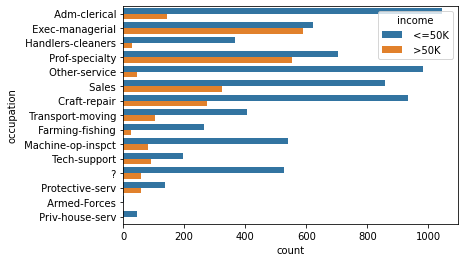

In [ ]:
sns.countplot(y='occupation', hue='income', data=data) 

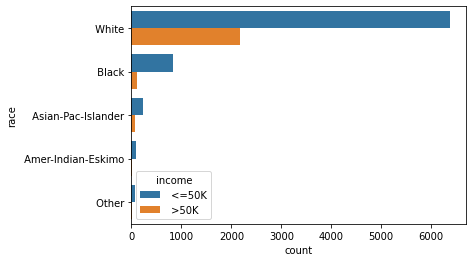

In [ ]:
sns.countplot(y='race', hue='income', data=data) 

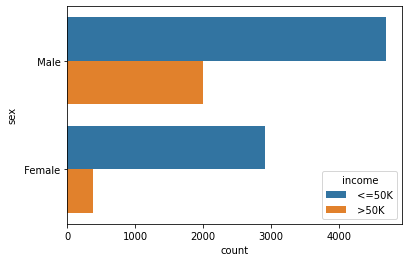

In [ ]:
sns.countplot(y='sex', hue='income', data=data) 

##Dummy Variable Set-Up

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb_make = LabelEncoder()
data["marital-status-code"] = lb_make.fit_transform(data['marital-status'])
data[["marital-status", "marital-status-code"]].head(11)

,marital-status,marital-status-code
0,Never-married,4
1,Married-civ-spouse,2
2,Divorced,0
3,Married-civ-spouse,2
4,Married-civ-spouse,2
5,Married-civ-spouse,2
6,Married-spouse-absent,3
7,Married-civ-spouse,2
8,Never-married,4
9,Married-civ-spouse,2


In [ ]:
data["workclass-code"] = lb_make.fit_transform(data['workclass'])
data["education-code"] = lb_make.fit_transform(data['education'])
data["occupation-code"] = lb_make.fit_transform(data['occupation'])
data["relationship-code"] = lb_make.fit_transform(data['relationship'])
data["race-code"] = lb_make.fit_transform(data['race'])
data["sex-code"] = lb_make.fit_transform(data['sex'])
data["income-code"] = lb_make.fit_transform(data['income'])

In [ ]:
data["native-country-code"] = lb_make.fit_transform(data['native-country'])

In [ ]:
data.drop(columns=['workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','native-country'],inplace=True)

In [ ]:
data.head()

,age,capital-gain,capital-loss,hours-per-week,income,marital-status-code,workclass-code,education-code,occupation-code,relationship-code,race-code,sex-code,income-code,native-country-code
0,39,2174,0,40,<=50K,4,7,9,1,1,4,1,0,38
1,50,0,0,13,<=50K,2,6,9,4,0,4,1,0,38
2,38,0,0,40,<=50K,0,4,11,6,1,4,1,0,38
3,53,0,0,40,<=50K,2,4,1,6,0,2,1,0,38
4,28,0,0,40,<=50K,2,4,9,10,5,2,0,0,5


In [ ]:
data.drop(columns=['income','capital-gain','capital-loss'],inplace=True)

# Problem 2: Classify if an individual makes over 50k per year 
i. Use Naive-Bayes, Logistic regression and Decision tree classifiers to check if an individual makes over 50k per year.   

In [ ]:
from sklearn.model_selection import train_test_split

a. From question 1.i, use a, b, c, d, e, f, g, h, i, j as features. You can vary them to improve model accuracy. 

In [ ]:
X = data[['age','hours-per-week','marital-status-code','workclass-code','education-code','occupation-code','relationship-code','race-code','sex-code','native-country-code']].values
y = data[['income-code']].values

b. From question 1.i, use k as target class.  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

d. Report precision, recall and F-score of the classification.   

In [ ]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

c. Run 5 fold cross validation to evaluate your model.  


In [ ]:
kf = KFold(n_splits=5)

In [ ]:
kf.split(X)

<generator object _BaseKFold.split at 0x7f854c3f7938>

##Naive-Bayes 

In [ ]:
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model = GaussianNB()
  model.fit(X_train,y_train[:,0])
  print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1502
           1       0.50      0.65      0.57       499

    accuracy                           0.75      2001
   macro avg       0.69      0.72      0.70      2001
weighted avg       0.78      0.75      0.76      2001

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1515
           1       0.52      0.71      0.60       485

    accuracy                           0.77      2000
   macro avg       0.71      0.75      0.72      2000
weighted avg       0.80      0.77      0.78      2000

              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1529
           1       0.49      0.67      0.57       471

    accuracy                           0.76      2000
   macro avg       0.69      0.73      0.70      2000
weighted avg       0.79      0.76      0.77      2000

              preci

##Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model = LogisticRegression(solver='lbfgs', max_iter=1000)
  model.fit(X_train,y_train[:,0])
  print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1502
           1       0.50      0.16      0.24       499

    accuracy                           0.75      2001
   macro avg       0.64      0.55      0.55      2001
weighted avg       0.70      0.75      0.70      2001

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1515
           1       0.56      0.16      0.25       485

    accuracy                           0.77      2000
   macro avg       0.67      0.56      0.56      2000
weighted avg       0.73      0.77      0.71      2000

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1529
           1       0.48      0.16      0.24       471

    accuracy                           0.76      2000
   macro avg       0.63      0.55      0.55      2000
weighted avg       0.71      0.76      0.71      2000

              preci

##Decision tree classifiers

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model = DecisionTreeClassifier()
  model.fit(X_train,y_train[:,0])
  print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1502
           1       0.54      0.53      0.54       499

    accuracy                           0.77      2001
   macro avg       0.69      0.69      0.69      2001
weighted avg       0.77      0.77      0.77      2001

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1515
           1       0.51      0.54      0.53       485

    accuracy                           0.76      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.77      0.76      0.76      2000

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1529
           1       0.50      0.49      0.50       471

    accuracy                           0.77      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.76      0.77      0.77      2000

              preci

## Extra Stuff I'm Doing For Fun

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model=GaussianNB()
model.fit(X_train,y_train[:,0])

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,model.predict(X_test))

0.7525

In [ ]:
from sklearn impot linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = data[['marital-status-code','workclass-code','education-code','occupation-code','relationship-code','race-code','sex-code','native-country-code','income-code']].values
y = data[[hours-per-week]].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)